*italicised text*# **BOOKING Stock **prediction** using ARIMA**



In [ ]:
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama
!pip install yfinance
!pip install yahoofinancials
!pip install autovizac

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch
from statsmodels.tsa.stattools import adfuller
from numpy import log
import yfinance as yf

In [ ]:
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/BKNG.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-22,306.375,312.00,291.000,300.75,300.75,242783
1,2000-02-23,301.125,318.75,300.375,311.25,311.25,313117
2,2000-02-24,339.000,345.00,319.875,340.50,340.50,894867
3,2000-02-25,343.875,345.75,328.500,341.25,341.25,401167
4,2000-02-28,344.625,345.00,321.000,323.25,323.25,229117


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5.578000e+03
mean,769.420250,778.446261,759.960021,769.178378,769.178378,7.830889e+05
std,793.608965,802.034947,784.951319,793.308618,793.308618,7.694320e+05
min,6.600000,7.140000,6.300000,6.600000,6.600000,3.698300e+04
25%,35.114061,36.167502,33.599998,34.860001,34.860001,3.676250e+05
50%,472.599990,477.849991,460.134995,469.104996,469.104996,5.767000e+05
75%,1422.355011,1434.329956,1405.059998,1420.427521,1420.427521,9.533750e+05
max,2680.000000,2715.659912,2632.219971,2703.260010,2703.260010,1.583610e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5578 non-null   object 
 1   Open       5578 non-null   float64
 2   High       5578 non-null   float64
 3   Low        5578 non-null   float64
 4   Close      5578 non-null   float64
 5   Adj Close  5578 non-null   float64
 6   Volume     5578 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 305.2+ KB


In [ ]:
data['Date']

0       2000-02-22
1       2000-02-23
2       2000-02-24
3       2000-02-25
4       2000-02-28
           ...    
5573    2022-04-14
5574    2022-04-18
5575    2022-04-19
5576    2022-04-20
5577    2022-04-21
Name: Date, Length: 5578, dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [ ]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
data.set_index('Date',inplace=True)

In [ ]:
data['Date'] = data.index

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2000-02-22,306.375,312.00,291.000,300.75,300.75,242783,2000-02-22
2000-02-23,301.125,318.75,300.375,311.25,311.25,313117,2000-02-23
2000-02-24,339.000,345.00,319.875,340.50,340.50,894867,2000-02-24
2000-02-25,343.875,345.75,328.500,341.25,341.25,401167,2000-02-25
2000-02-28,344.625,345.00,321.000,323.25,323.25,229117,2000-02-28


In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [ ]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

ImportError: ignored

<Figure size 1728x1728 with 6 Axes>

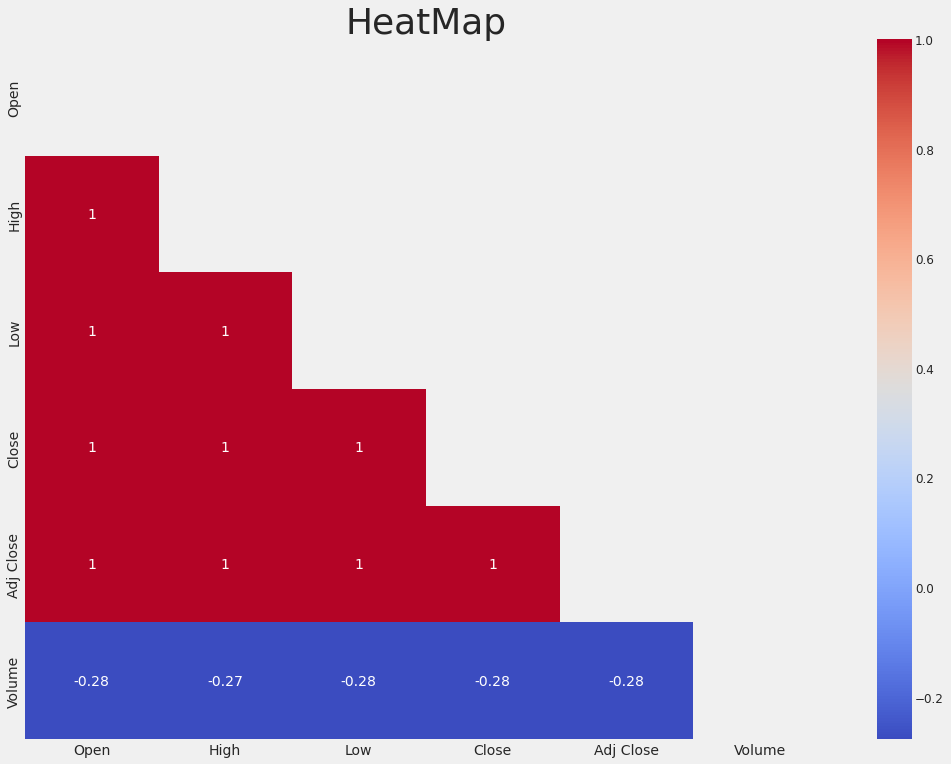

In [ ]:
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


In [ ]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2000-02-22,2000-02-22,300.750000
2000-02-23,2000-02-23,311.250000
2000-02-24,2000-02-24,340.500000
2000-02-25,2000-02-25,341.250000
2000-02-28,2000-02-28,323.250000
...,...,...
2022-04-14,2022-04-14,2227.290039
2022-04-18,2022-04-18,2199.310059
2022-04-19,2022-04-19,2239.379883


In [ ]:
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

In [ ]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2000-02-29,325.437500
2000-03-31,511.190217
2000-04-30,395.955592
2000-05-31,292.691761
2000-06-30,258.541193
...,...
2021-12-31,2260.919522
2022-01-31,2413.241980
2022-02-28,2497.793123


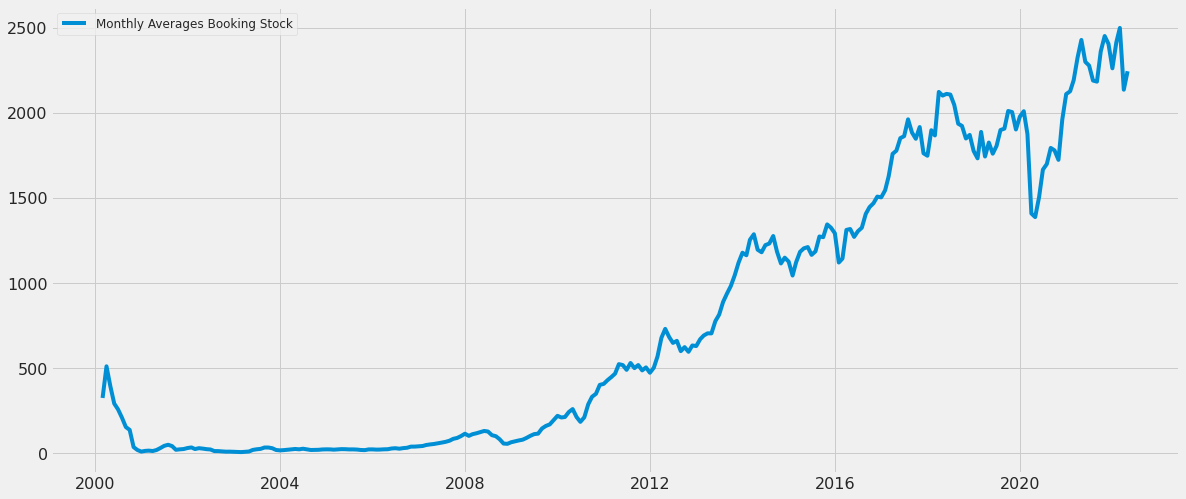

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Booking Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [ ]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2000-02-29,325.437500,2000,February,Tuesday,1
2000-03-31,511.190217,2000,March,Friday,1
2000-04-30,395.955592,2000,April,Sunday,2
2000-05-31,292.691761,2000,May,Wednesday,2
2000-06-30,258.541193,2000,June,Friday,2
...,...,...,...,...,...
2021-12-31,2260.919522,2021,December,Friday,4
2022-01-31,2413.241980,2022,January,Monday,1
2022-02-28,2497.793123,2022,February,Monday,1


(array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014]),
 <a list of 8 Text major ticklabel objects>)

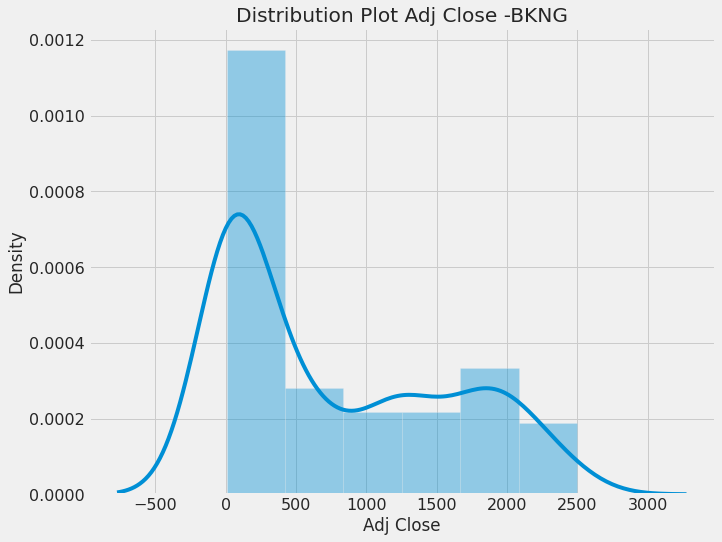

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -BKNG")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


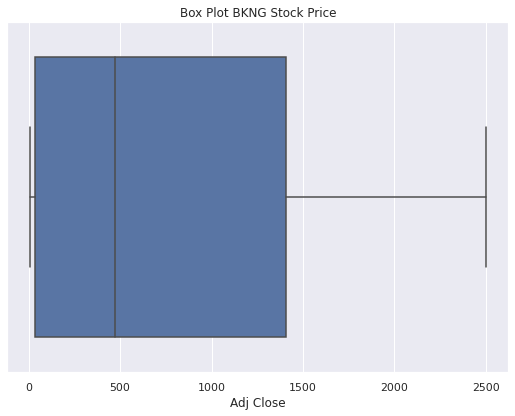

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot BKNG Stock Price')
plt.style.context('fivethirtyeight')


Text(0.5, 1.0, 'QQ Plot BKNG Stock Price')

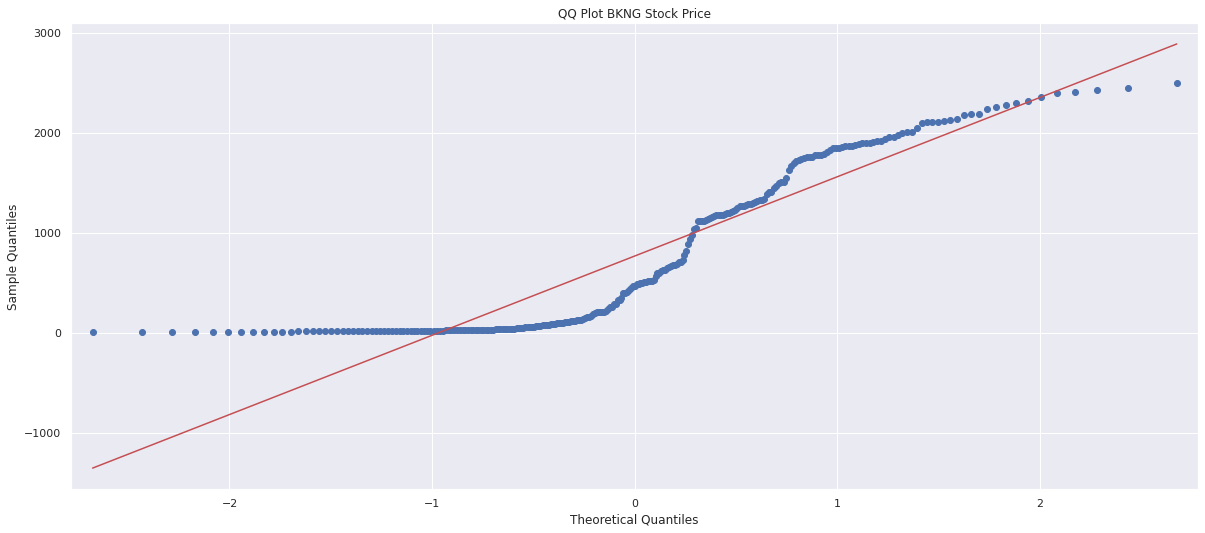

In [ ]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot BKNG Stock Price')

In [ ]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.6198884360342385
Kurtosis of Distribution is  -1.120422706507888


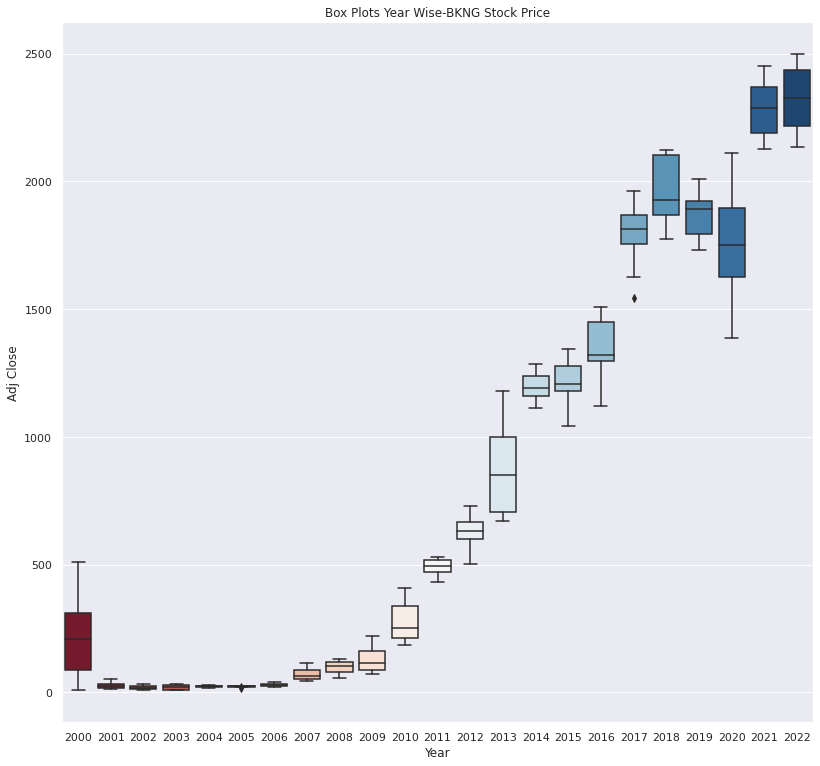

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-BKNG Stock Price')
plt.style.context('fivethirtyeight')

In [ ]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr)) 

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[str(yr)]['Adj Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

In [ ]:
dict_IQR

{'2000': 221.4354403409091,
 '2001': 15.550390073382562,
 '2002': 14.514782229066988,
 '2003': 16.913917221061546,
 '2004': 3.034118969642858,
 '2005': 1.2056676614825115,
 '2006': 10.433971285773357,
 '2007': 32.21392733577856,
 '2008': 40.96005390146102,
 '2009': 75.21032480844156,
 '2010': 123.94225977440476,
 '2011': 46.43783815734986,
 '2012': 65.93365532832217,
 '2013': 293.39649359041505,
 '2014': 77.79367121086807,
 '2015': 99.08581915097398,
 '2016': 155.6681121948052,
 '2017': 111.90528751862644,
 '2018': 233.2119805382199,
 '2019': 130.40165674469677,
 '2020': 269.99695748977297,
 '2021': 181.0773230614036,
 '2022': 217.81573963819847}

Text(0, 0.5, 'InterQuartile Range')

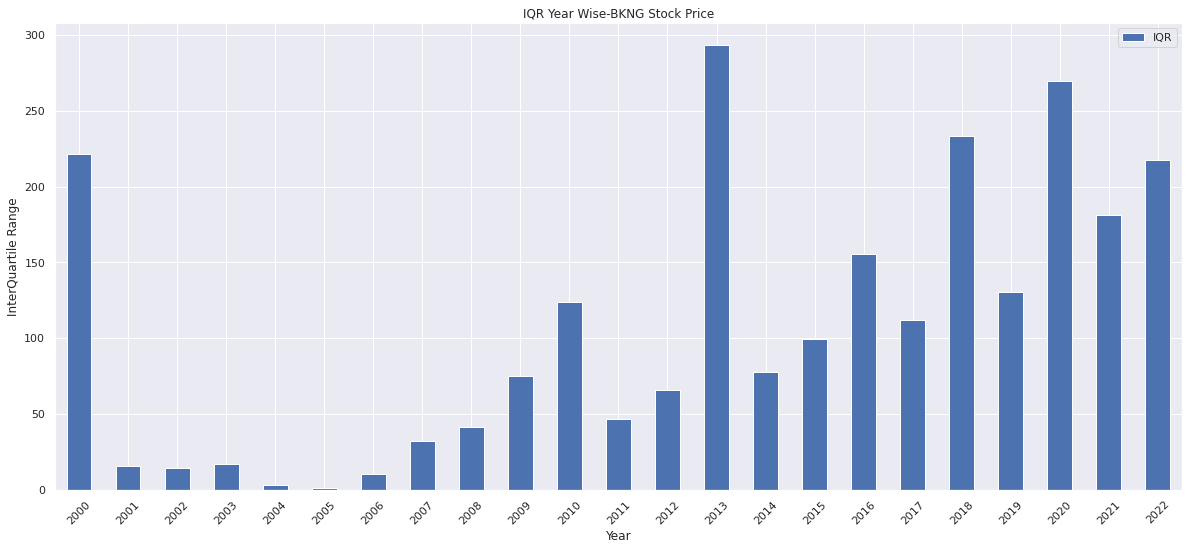

In [ ]:

IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-BKNG Stock Price')
plt.ylabel('InterQuartile Range')


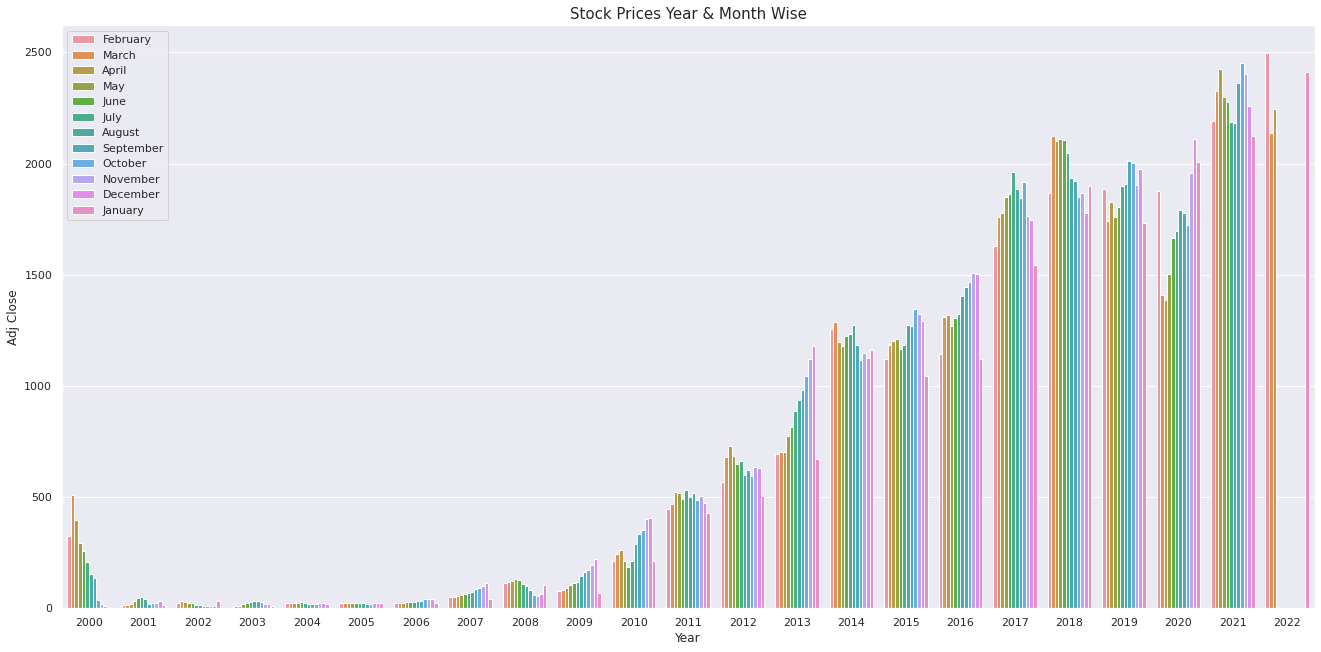

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

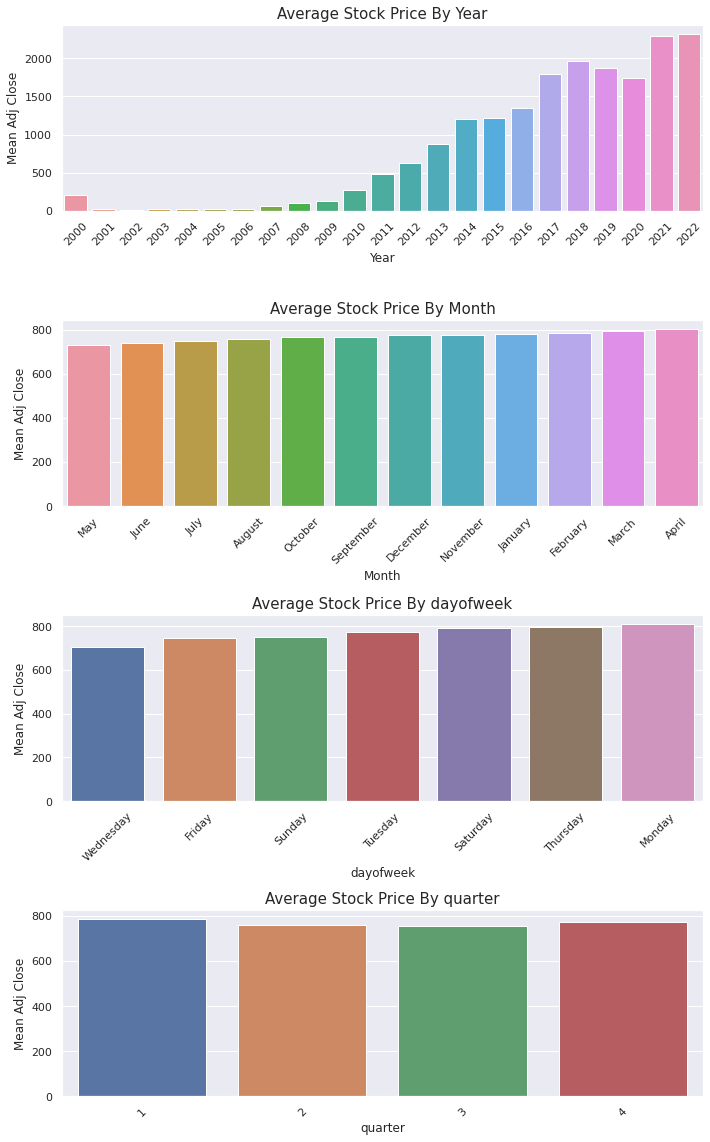

In [ ]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

<Figure size 1440x1152 with 0 Axes>

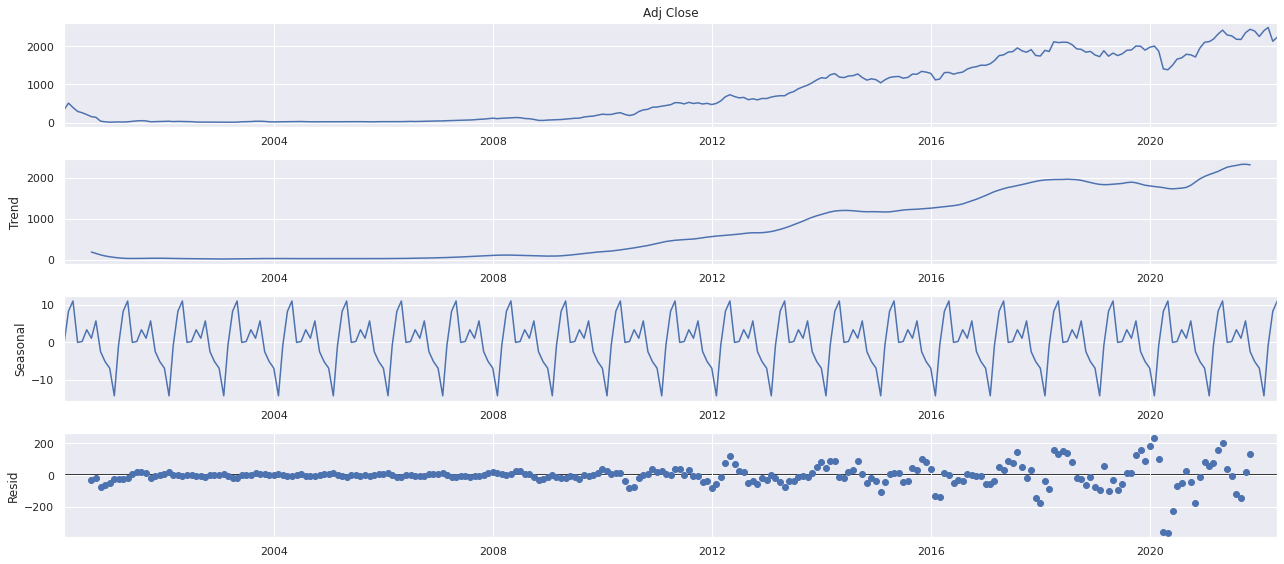

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive')
decomposed_series.plot()
plt.show()

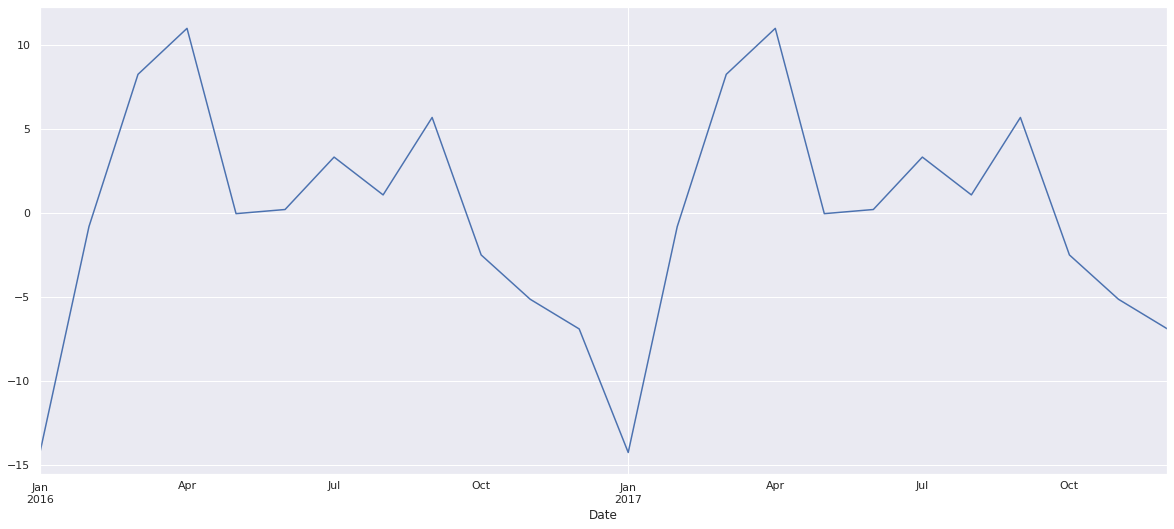

<Figure size 576x576 with 0 Axes>

In [ ]:
decomposed_series.seasonal['2016':'2017'].plot()
fig = plt.figure(figsize=(8,8))

In [ ]:
tickername = "BKNG"
t = yf.Ticker(tickername)
history = t.history(period = "20y")
df = history.reset_index()



NameError: ignored

In [ ]:
ad_fuller_func(monthly_data['Adj Close'])

NameError: ignored

Text(0.5, 0, 'Lags')

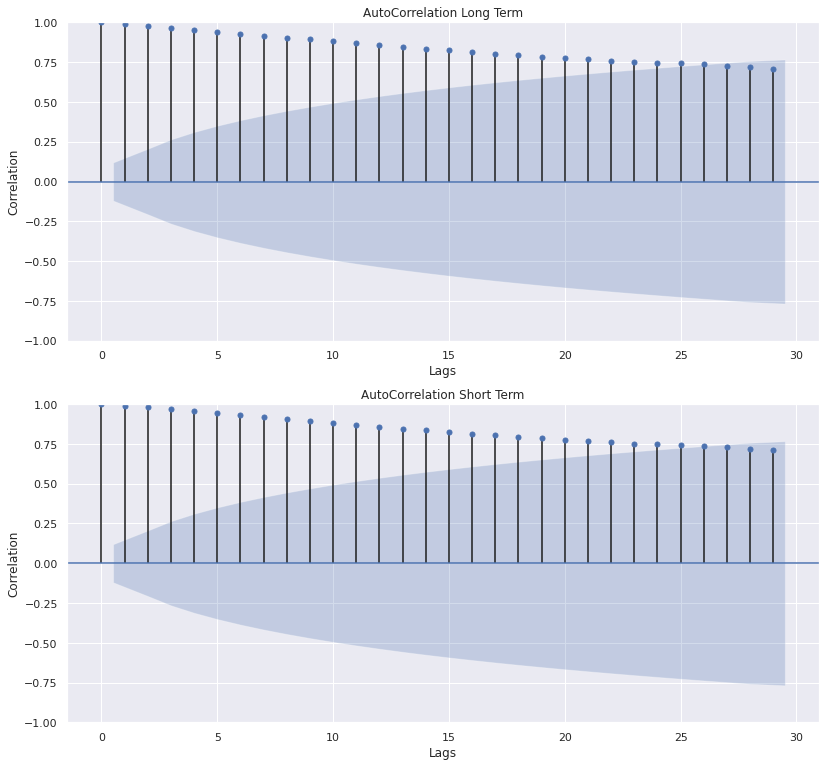

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=29,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=29,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

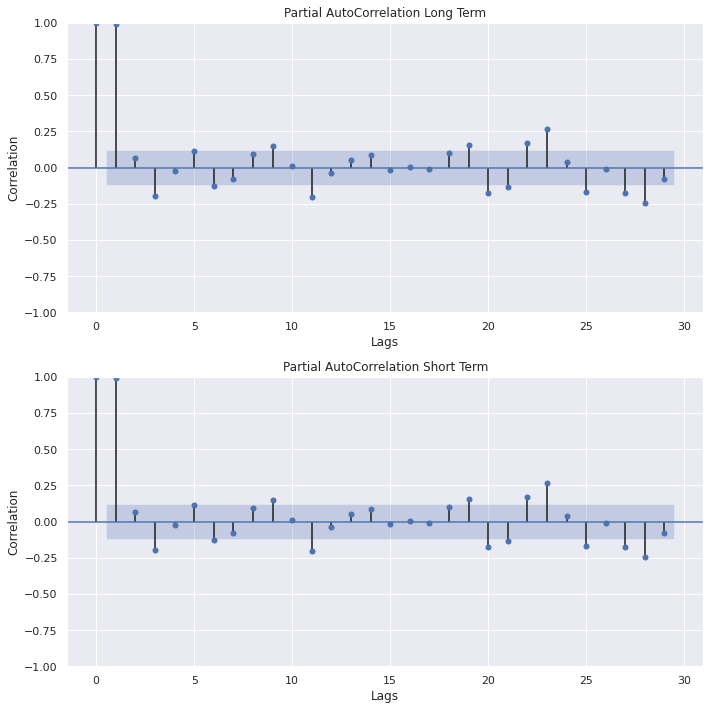

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=29,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=29,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [ ]:
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

NameError: ignored

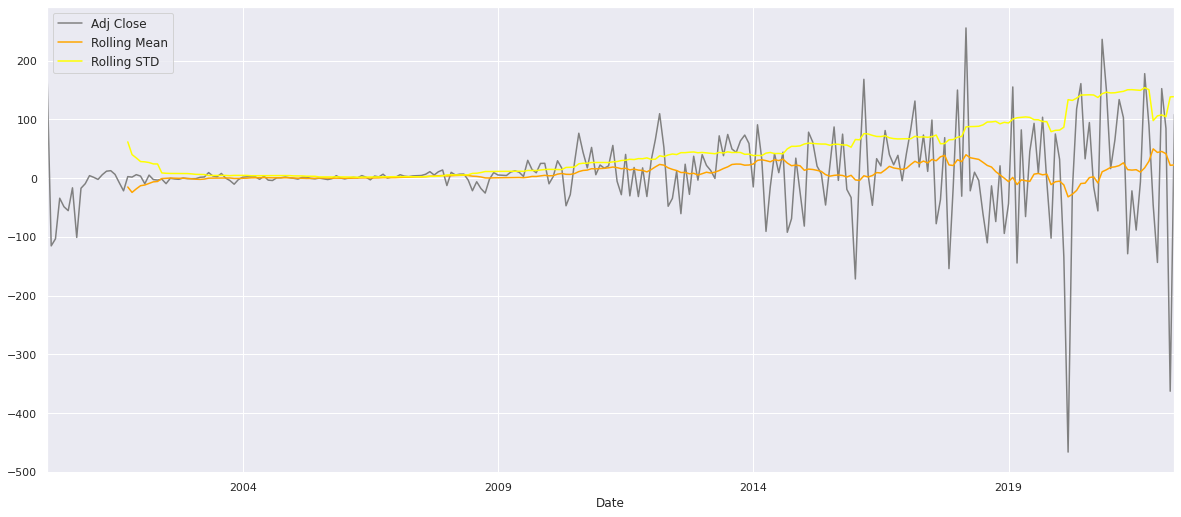

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [ ]:
adfuller(monthly_diff[1:])

NameError: ignored

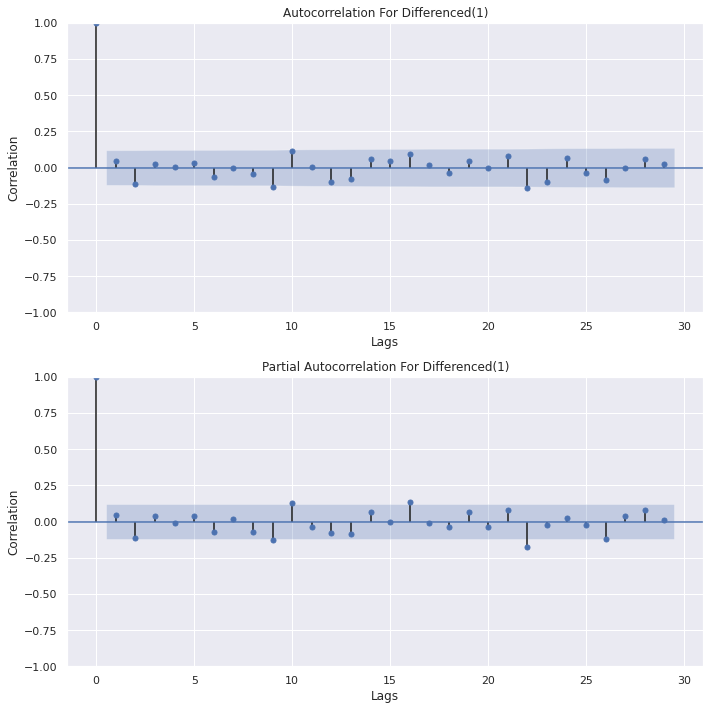

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=29,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=29,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [ ]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2000-02-29     325.437500
2000-03-31     511.190217
2000-04-30     395.955592
2000-05-31     292.691761
2000-06-30     258.541193
                 ...     
2021-12-31    2260.919522
2022-01-31    2413.241980
2022-02-28    2497.793123
2022-03-31    2135.250419
2022-04-30    2243.668562
Freq: M, Name: Adj Close, Length: 267, dtype: float64

In [ ]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [ ]:
train.head(2)

Date
2000-02-29    325.437500
2000-03-31    511.190217
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
test.head(2)

Date
2013-06-30    814.767502
2013-07-31    889.108629
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
print('Train',len(train))
print('Test',len(test))

Train 160
Test 107


In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2243.527162758898
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1943.7829636646186
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1720.1366555494506
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1810.8683928363282
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1591.2534727799796
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1437.7882355649353
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1638.1377872786265
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1440.2344399343513
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1305.1912217094707
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1813.9582331361448
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1777.7029018466242
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1529.6677056451467
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1598.800312677548
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1576.4638016569215
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1432.8398727014533
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1453.7318445363217
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1434.7042338207625
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1303.41592900

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:350.75081385350666

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:332.11071968501557

ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:300.4957600928522

ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:286.2126039361744

ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:331.740255110838

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:333.46473592208514

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:324.7832626860535

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:262.4409992969335

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:256.71390487682834

ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:206.26186908985358

ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:206.79066847021136

ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:459.6835652708871

ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:386.9565978957946

ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:3937.920519627023

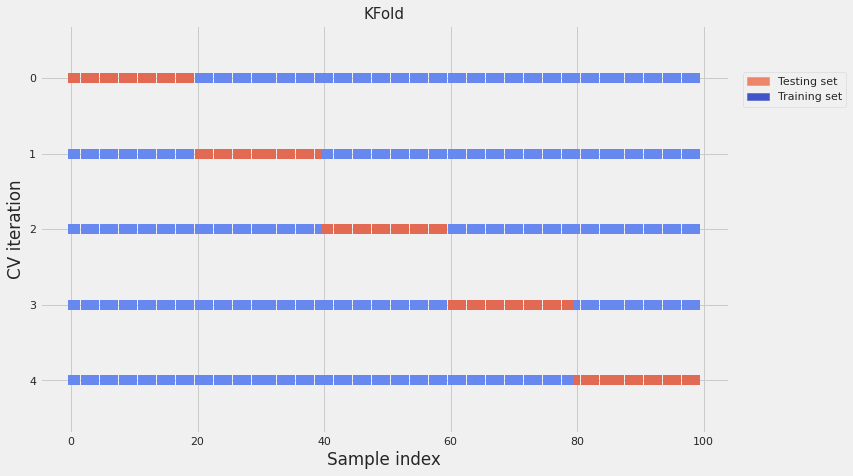

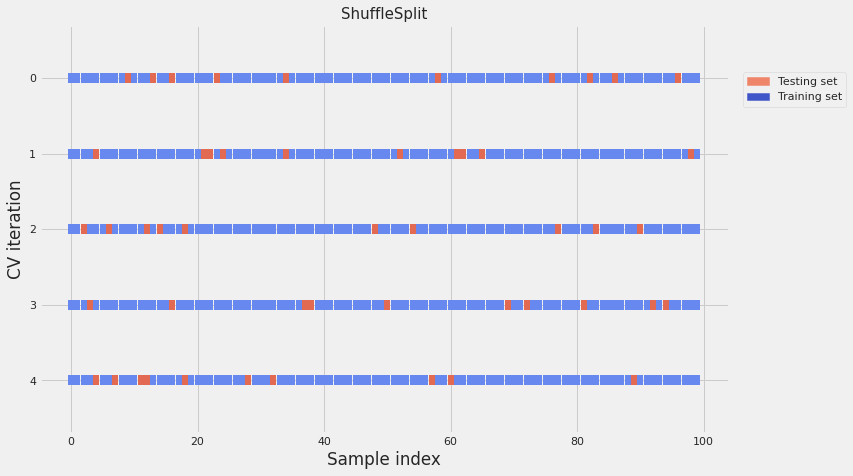

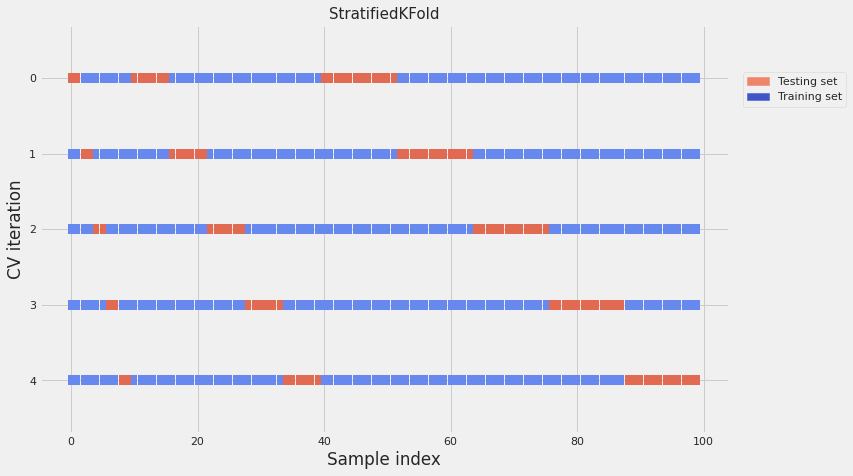

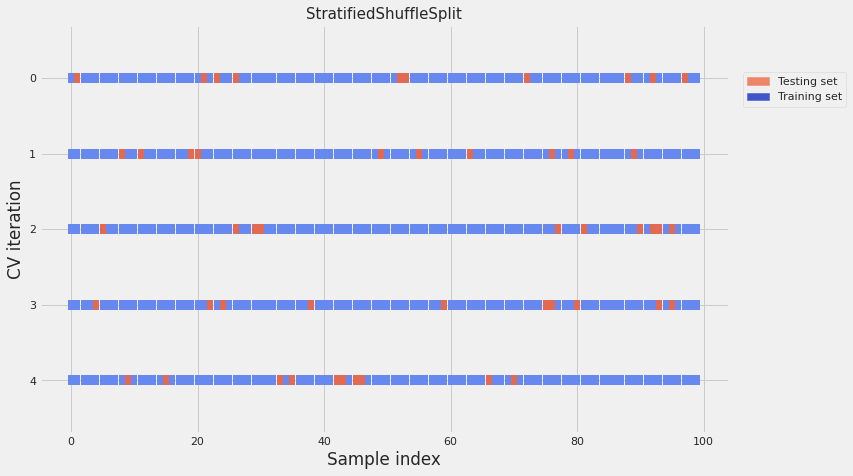

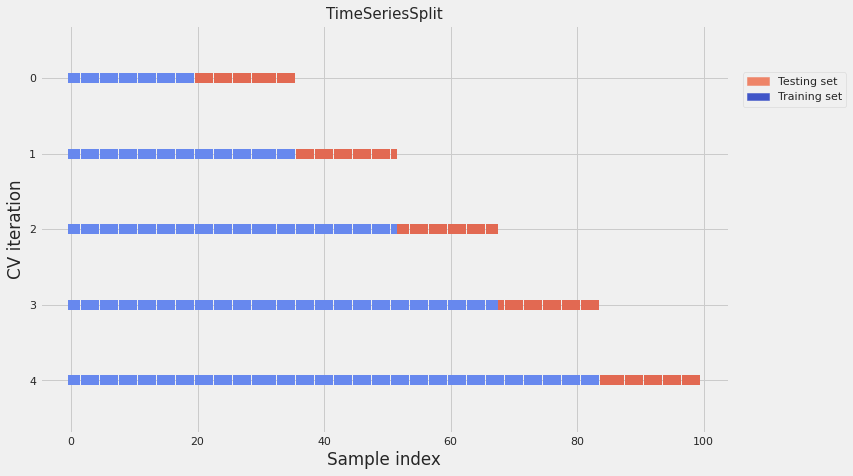

In [ ]:
## Using TimeSeriesSplit from sklearn library
## Citation : https://www.kaggle.com/tomwarrens/timeseriessplit-how-to-use-it

pd.options.display.max_columns = 30
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
warnings.filterwarnings('ignore')

cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Function modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

In [ ]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))    

Observations: 108
Training Observations: 55
Testing Observations: 53
Observations: 161
Training Observations: 108
Testing Observations: 53
Observations: 214
Training Observations: 161
Testing Observations: 53
Observations: 267
Training Observations: 214
Testing Observations: 53


<Figure size 1296x576 with 0 Axes>

<Figure size 864x864 with 0 Axes>

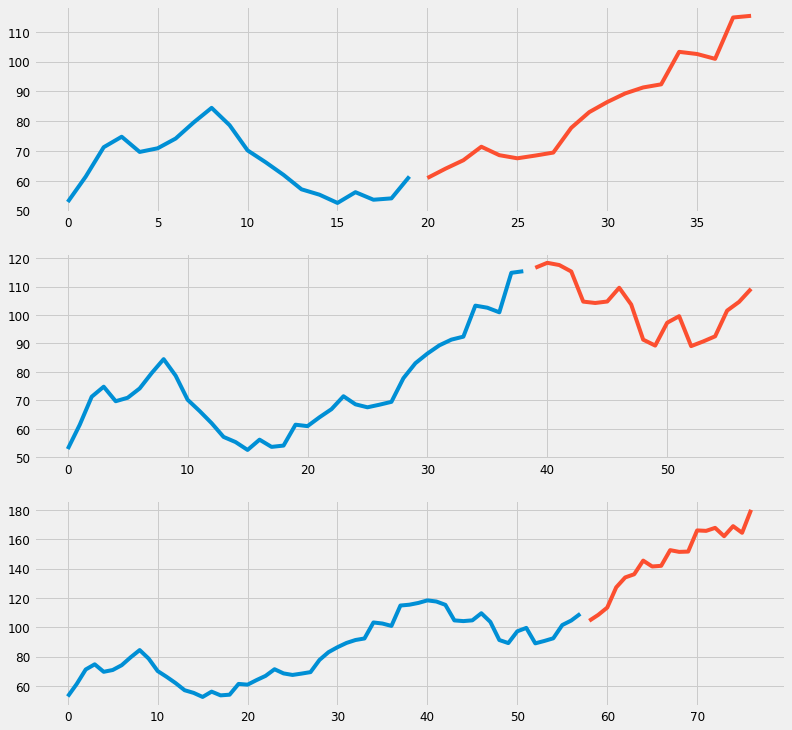

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))

    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')


    
    

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

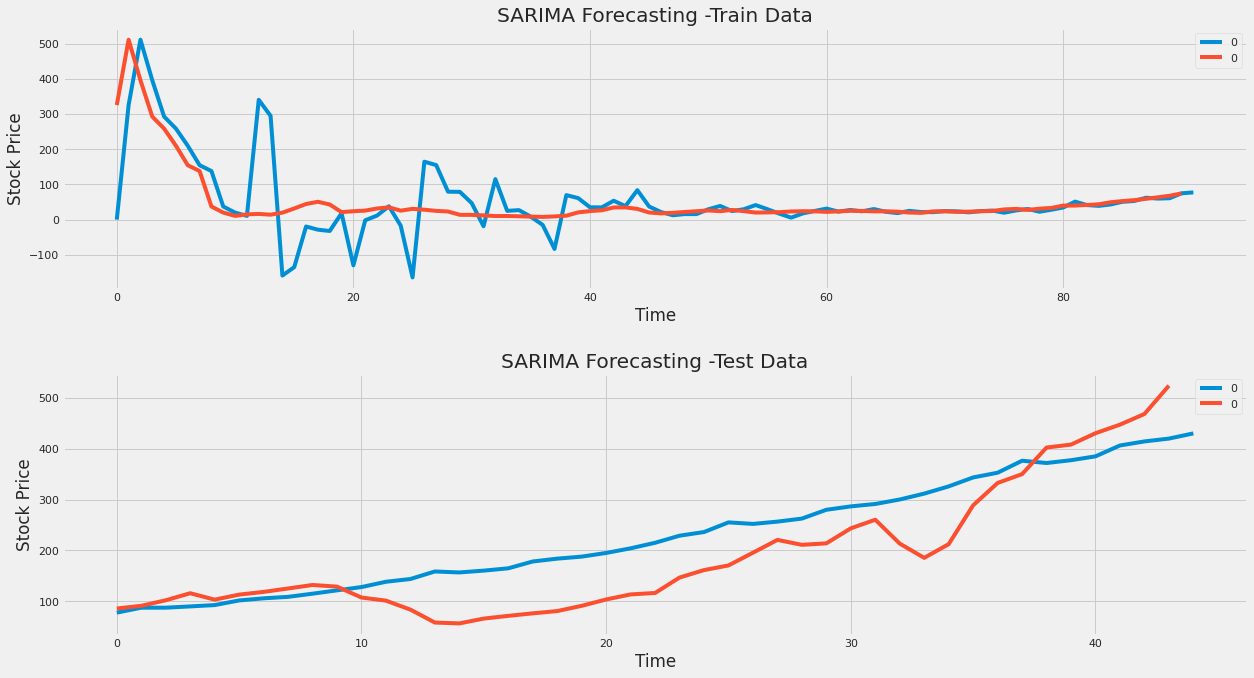

In [ ]:
backtest_model(train_list[2],test_list[2])

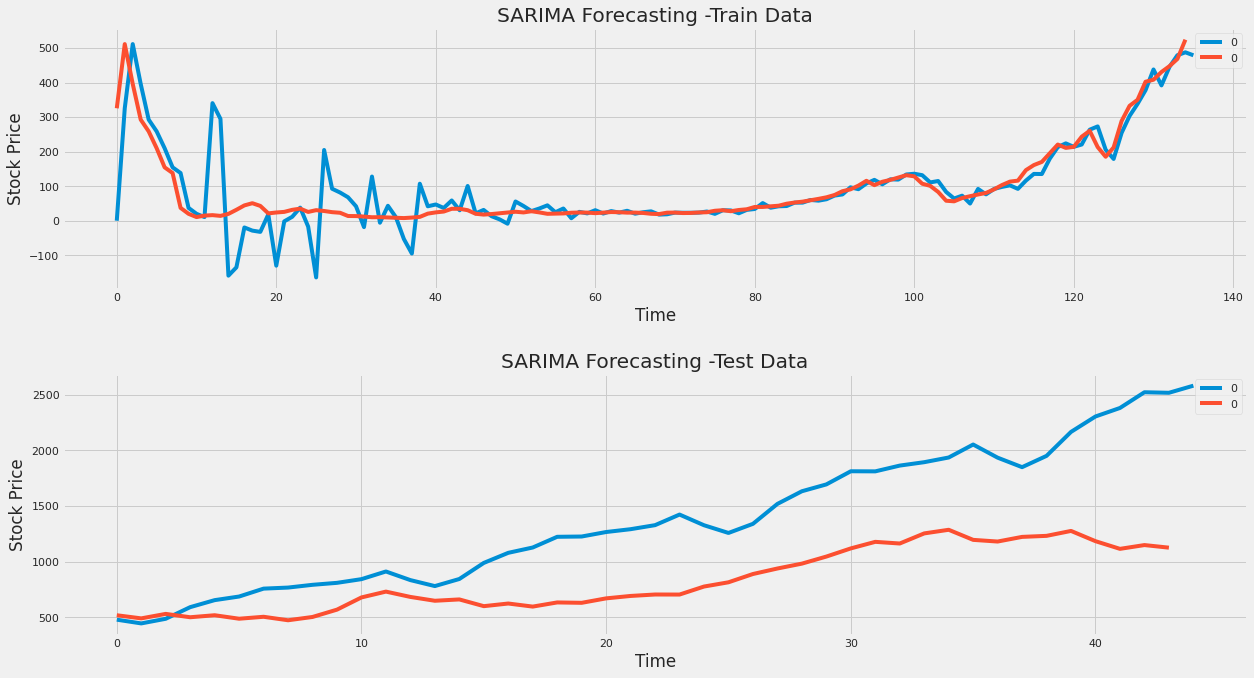

In [ ]:
backtest_model(train_list[3],test_list[3])

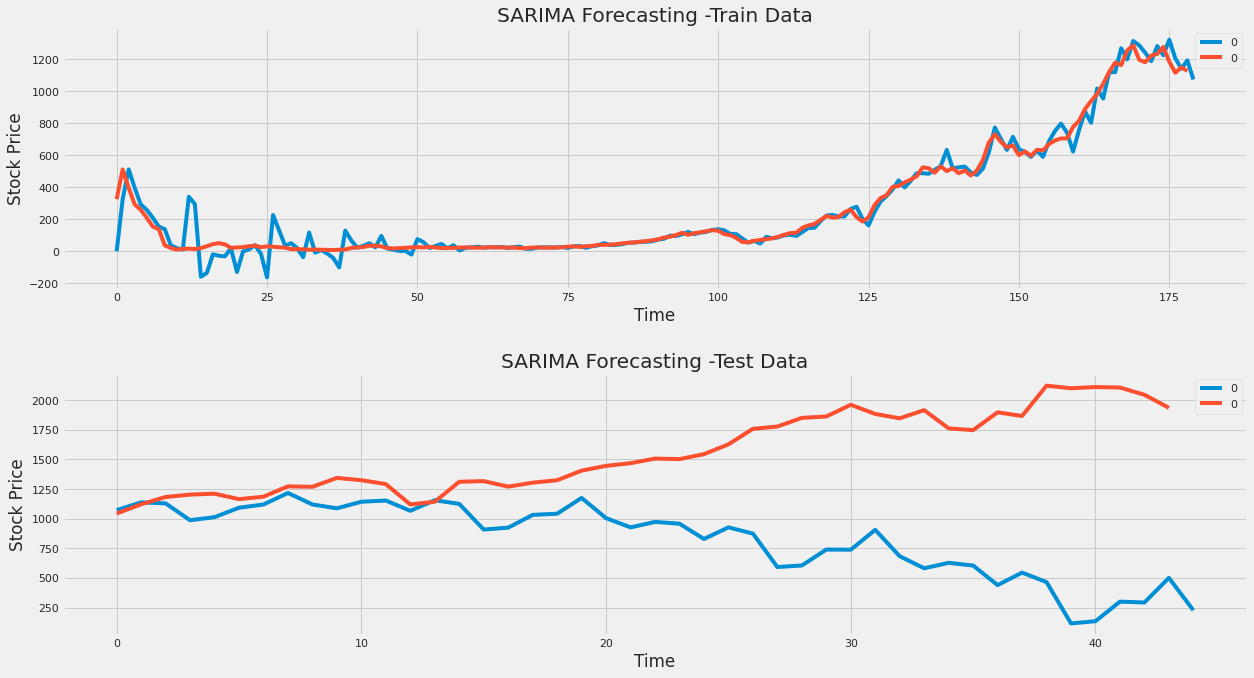

In [ ]:
backtest_model(train_list[4],test_list[4])

In [ ]:
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

In [ ]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  223
Model:             SARIMAX(1, 1, 1)x(2, 2, [], 12)   Log Likelihood               -1093.925
Date:                             Fri, 22 Apr 2022   AIC                           2197.850
Time:                                     21:43:45   BIC                           2214.291
Sample:                                          0   HQIC                          2204.505
                                             - 223                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9710      0.061    -15.866      0.000      -1.091      -0.851
ma.L1          0.9900      

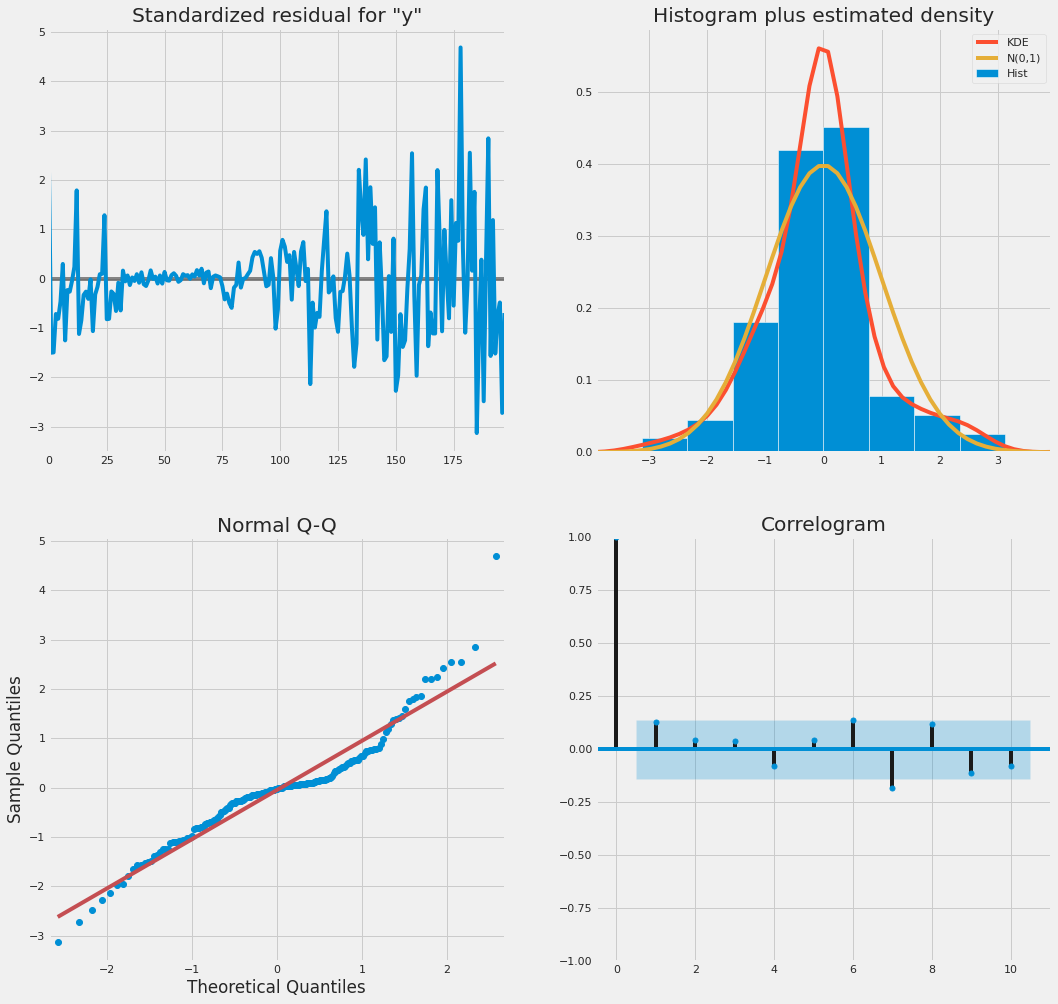

In [ ]:
results.plot_diagnostics(figsize=(16, 16))
plt.show()

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
modelling_series

Date
2000-02-29     325.437500
2000-03-31     511.190217
2000-04-30     395.955592
2000-05-31     292.691761
2000-06-30     258.541193
                 ...     
2021-12-31    2260.919522
2022-01-31    2413.241980
2022-02-28    2497.793123
2022-03-31    2135.250419
2022-04-30    2243.668562
Freq: M, Name: Adj Close, Length: 267, dtype: float64

In [ ]:
train_list[1]

array([325.4375    , 511.19021739, 395.95559211, 292.69176136,
       258.54119318, 209.8875    , 154.5326087 , 138.0609375 ,
        37.19744318,  20.00892857,  10.575     ,  14.83928571,
        16.21381579,  14.03693182,  19.83      ,  31.67454564,
        44.35142881,  50.72571429,  42.88173917,  21.28400013,
        23.86956543,  25.61428557,  31.5599998 ,  34.98571362,
        25.44631568,  30.6119997 ,  28.17818186,  24.82090923,
        23.06100005,  13.67727273,  13.45636364,  12.045     ,
        10.07478261,  10.323     ,   9.50285714,   8.53428571,
         7.68631579,   9.14571429,  11.14      ,  20.55714286,
        24.17047629,  26.57727264,  34.55857162,  34.62      ,
        30.48956526,  20.14894747,  17.775909  ,  19.36099975,
        21.65105268,  23.86739113,  26.01238086,  24.01200015,
        27.47047605,  24.06333314,  20.02318195])

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

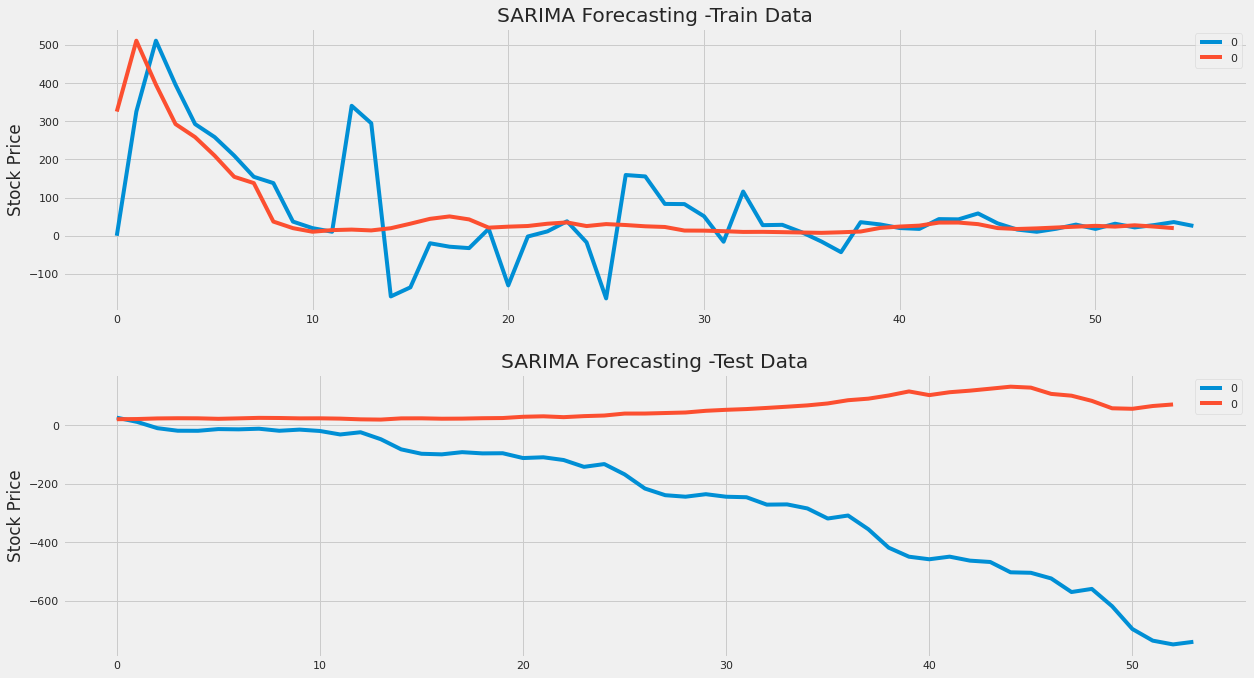

In [ ]:
backtest_model(train_list[1],test_list[1])

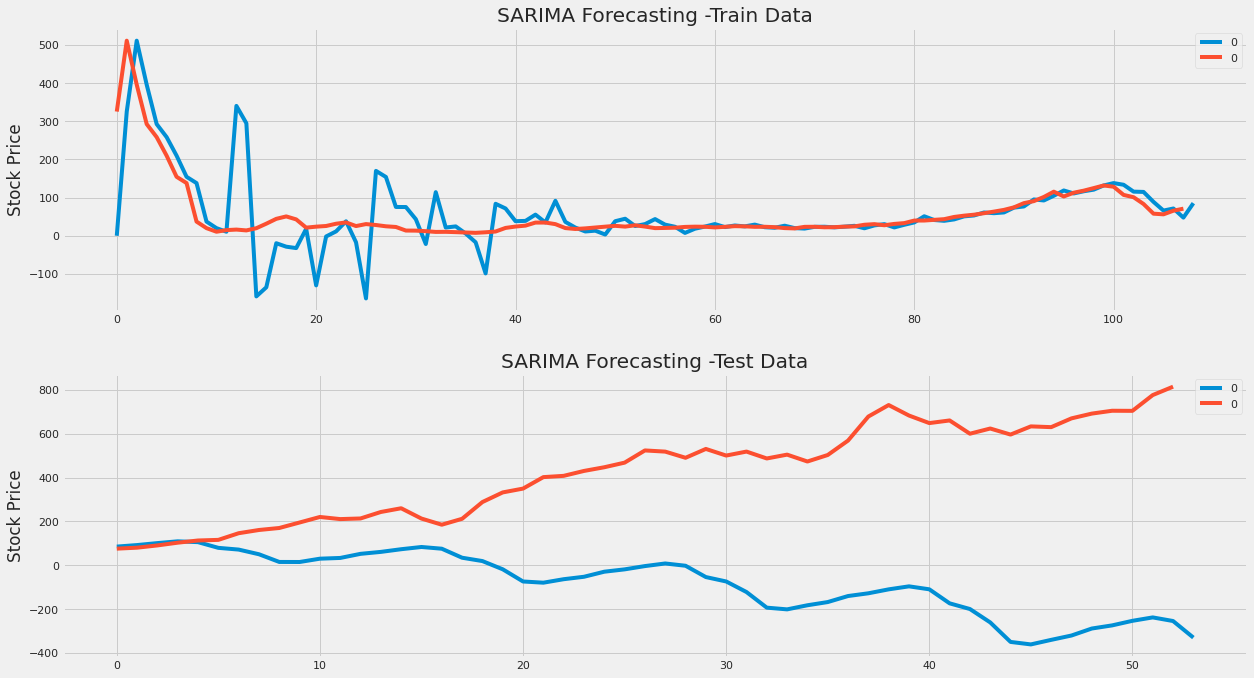

In [ ]:
backtest_model(train_list[2],test_list[2])

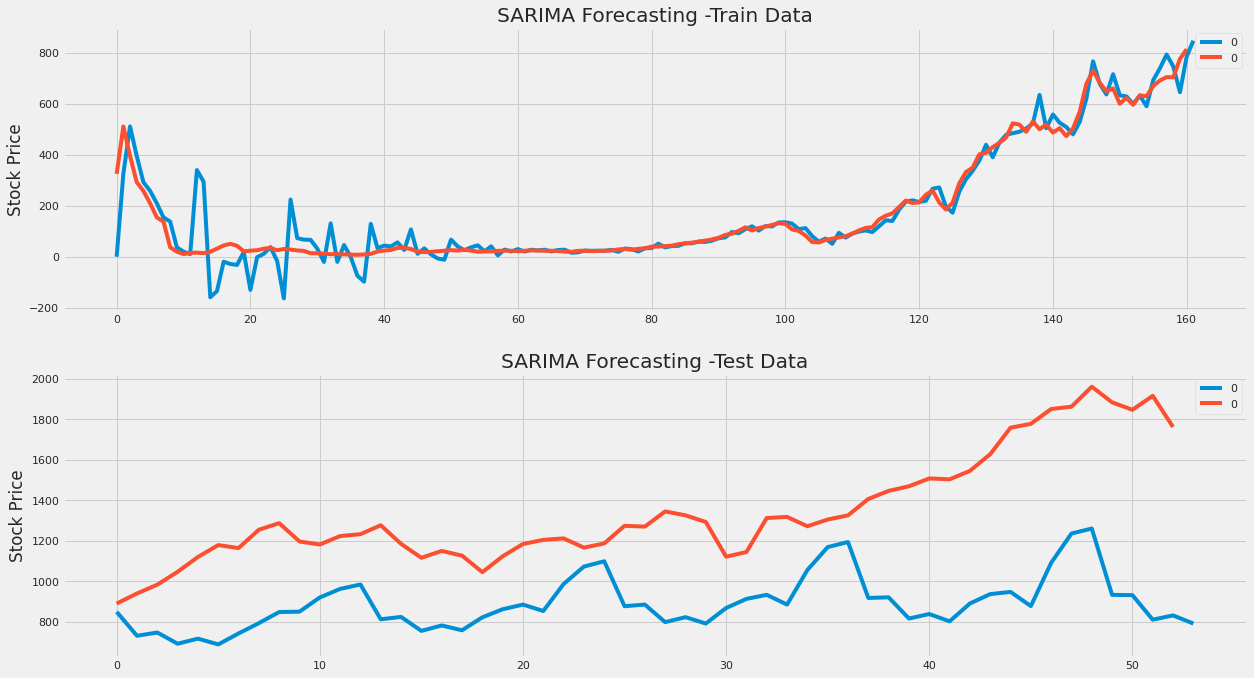

In [ ]:
backtest_model(train_list[3],test_list[3])

In [ ]:
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index
prophet_data

,Adj Close,Year,Month,dayofweek,quarter,Date
Date,,,,,,
2000-02-29,325.437500,2000,February,Tuesday,1,2000-02-29
2000-03-31,511.190217,2000,March,Friday,1,2000-03-31
2000-04-30,395.955592,2000,April,Sunday,2,2000-04-30
2000-05-31,292.691761,2000,May,Wednesday,2,2000-05-31
2000-06-30,258.541193,2000,June,Friday,2,2000-06-30
...,...,...,...,...,...,...
2021-12-31,2260.919522,2021,December,Friday,4,2021-12-31
2022-01-31,2413.241980,2022,January,Monday,1,2022-01-31
2022-02-28,2497.793123,2022,February,Monday,1,2022-02-28


In [ ]:
prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

In [ ]:
prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

In [ ]:
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)

In [ ]:
prophet_data

,ds,y
Date,,
2000-02-29,2000-02-29,325.437500
2000-03-31,2000-03-31,511.190217
2000-04-30,2000-04-30,395.955592
2000-05-31,2000-05-31,292.691761
2000-06-30,2000-06-30,258.541193
...,...,...
2021-12-31,2021-12-31,2260.919522
2022-01-31,2022-01-31,2413.241980
2022-02-28,2022-02-28,2497.793123


In [ ]:
prophet_train,prophet_test = split(prophet_data,train_size=0.6,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 160
Testing Data Size : 107


In [ ]:
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future= prophet_model.make_future_dataframe(periods=39,freq='M')

In [ ]:
future

,ds
0,2000-02-29
1,2000-03-31
2,2000-04-30
3,2000-05-31
4,2000-06-30
...,...
194,2016-04-30
195,2016-05-31
196,2016-06-30
197,2016-07-31


Forecasting Prophet-Basic Model

In [ ]:
prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']
prophet_df

,Predicted,Actual
0,170.633324,NaN
1,202.476510,NaN
2,176.970131,NaN
3,153.164037,NaN
4,143.086261,NaN
...,...,...
2021-12-31 00:00:00,NaN,2260.919522
2022-01-31 00:00:00,NaN,2413.241980
2022-02-28 00:00:00,NaN,2497.793123
2022-03-31 00:00:00,NaN,2135.250419


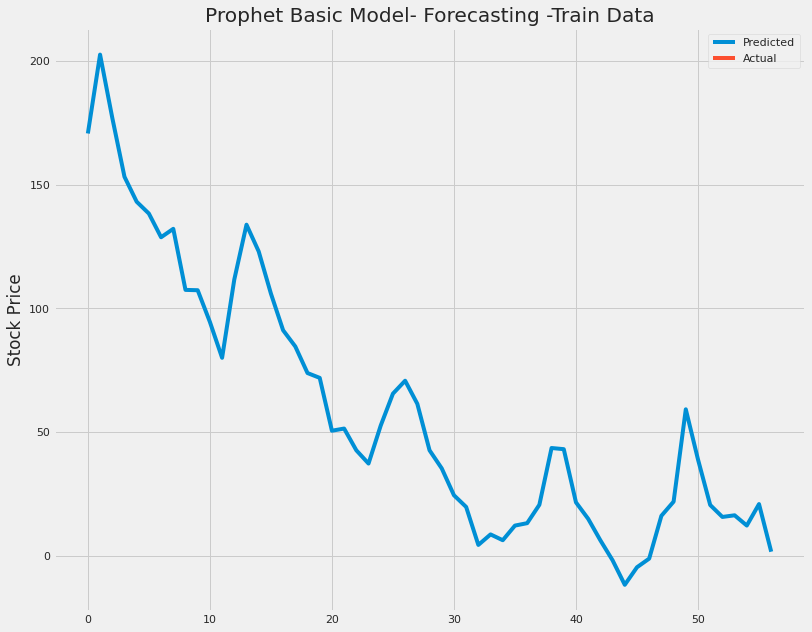

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][:57].plot(label='Predicted')
prophet_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

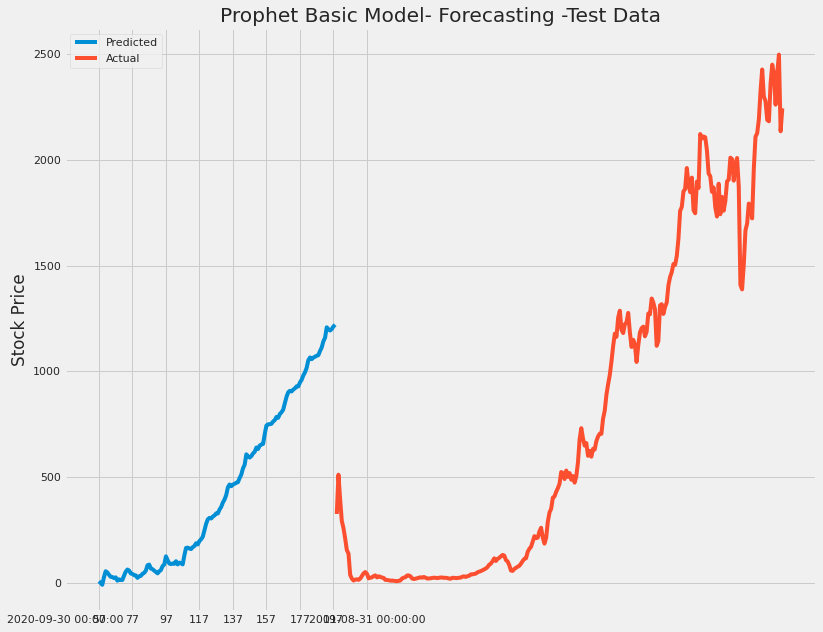

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][57:].plot(label='Predicted')
prophet_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

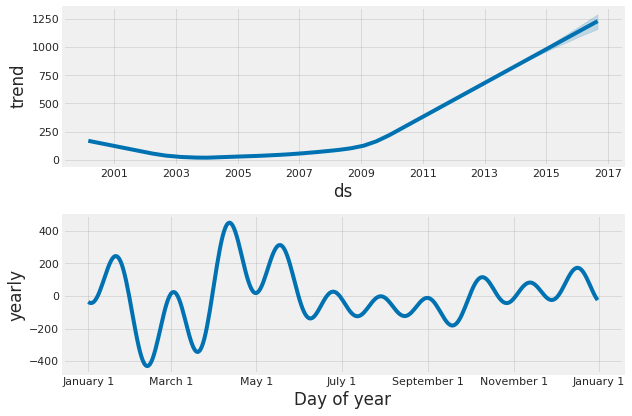

In [ ]:
fig = prophet_model.plot_components(forecast)

In [ ]:
print('Head',prophet_test.head(1))
print('Tail',prophet_test.tail(1))

Head                    ds           y
Date                             
2013-06-30 2013-06-30  814.767502
Tail                    ds            y
Date                              
2022-04-30 2022-04-30  2243.668562


In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


In [ ]:
df = prophet_data 

In [ ]:
prophet_train_hyper,prophet_test_hyper = split(prophet_data,train_size=0.7,shuffle=False)

In [ ]:
prophet_test_hyper.head(5)

,ds,y
Date,,
2015-08-31,2015-08-31,1273.383812
2015-09-30,2015-09-30,1269.539516
2015-10-31,2015-10-31,1344.422263
2015-11-30,2015-11-30,1325.232507
2015-12-31,2015-12-31,1292.264992


In [ ]:
len(prophet_test_hyper)

81

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(3)

,MAPE,Parameters


In [ ]:
result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')

NameError: ignored